# Ev.3:- HR Analytics Project- Understanding the Attrition in HR

In [11]:
#Libraries to be used for model building

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading the csv file.
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [13]:
# For fetching the first 5 rows from dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis Phase(EDA):-

In [14]:
# For checking the rows and columns present in the dataset.
data.shape

(1470, 35)

In [15]:
# For checking the Null/NAN values in the dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Since there are no Null values in the dataset as checked using above command.

In [16]:
# For checking the number of unique values 
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

All the columns are having some kind of uniqueness in it.

In [17]:
# For checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
# For seeing the available columns in the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

These are the available columns present in the dataset.

In [23]:
# For checking the datatypes of each columns.
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [24]:
# For checking the statistical summary of the dataset.
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In this, the presence of outliers and skewness present in some of the columns, outliers are present in the following column names:- Daily Rate, Distance From Home, 
Stock option Level, Total Working Years, Years at Company, Years in Current Role, Years Since Last Promotion, Years With Curr Manager.
Skewness present in DistanceFromHome, YearsAtCompany, Years in Current Role, Years since Last Promotion, Years With Curr Manager.

In [25]:
# For checking unique value count in column EmployeeNumber
data["EmployeeNumber"].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

As per the conceptual understanding , the above numeric data are the Employee Id which is not beneficial for model prediction.

In [26]:
# For checking the EmployeeCount also
data["EmployeeCount"].unique()

array([1], dtype=int64)

In [27]:
# For checking the StandardHours of Employees
data["StandardHours"].unique()

array([80], dtype=int64)

In this, the StandardHours are same for every employees so it is also not required for model prediction.

In [28]:
# For checking uniqueness in Over 18 column
data["Over18"].unique()

array(['Y'], dtype=object)

In this, the Over18 also contains same data for all employees and not required for model prediction.

In [29]:
# So dropping the not required columns from dataset in order to maintain accuarcy throughout model.
data.drop(["EmployeeNumber","EmployeeCount","StandardHours","Over18"],axis=1,inplace=True)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


So, as seen above the columns has been dropped perfectly.

In [30]:
# For checking the Attrition level counts in dataset
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Here, out of Total 1470 employees, 1233 employees are presently working in the organisation and the remaining 237 left the company.

<function matplotlib.pyplot.show(close=None, block=None)>

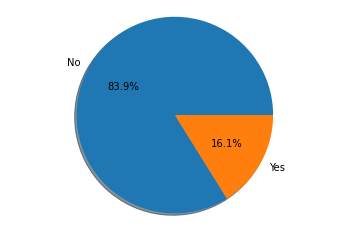

In [31]:
# For checking the Attrition using plotting method: PiePlot
a=data["Attrition"].value_counts()
plt.pie(a,labels=a.index, shadow=True, autopct="%0.1f%%")
plt.axis("equal")
plt.show

Here, it is clearly seen that the Attrition Rate is 16%.

<AxesSubplot:xlabel='Age', ylabel='count'>

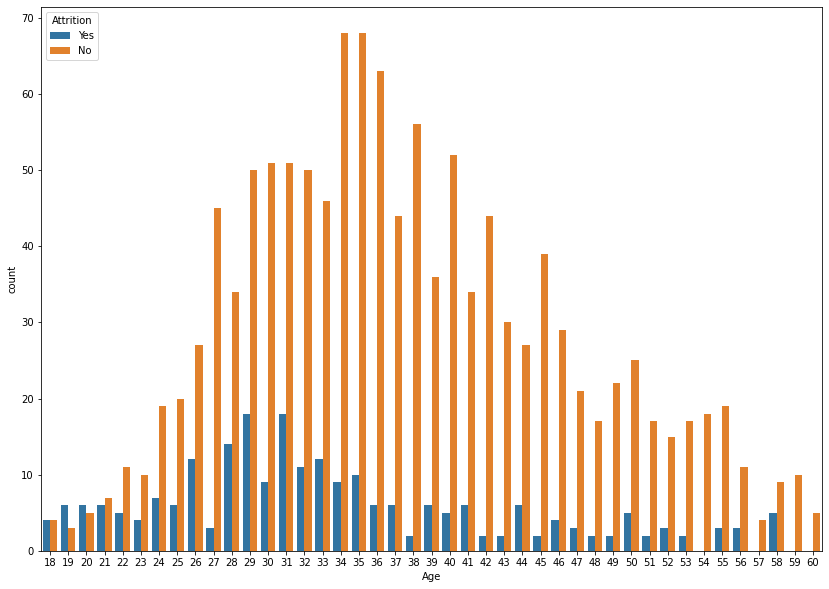

In [32]:
# For checking Attrition as per Age for more better figures for prediction
plt.subplots(figsize=(14,10))
sns.countplot(x="Age", hue="Attrition", data=data)

As seen above, the people in  age group of 26 to 33 left the company mostly, and attrition rate also is very high in this age group.
and people in the age group of 34 to 40 are satisfied to stay in the company.

In [33]:
# For checking columns and their unique values.

for i in data.columns:
    if data[i].dtype==object:
        print(str(i)+ " : "+ str(data[i].unique()) )
        print(data[i].value_counts())
        print("--------------")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
--------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
--------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Re

In [34]:
# For checking the correlation among columns
corr=data.corr()

In [35]:
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In this, as the datatype of Attrition column is object so it needs to be replaced with numerical values for further predictions

In [36]:
# For changing values of Yes and No to 0 and 1.
data["Attrition"]=data["Attrition"].replace("No",0).replace("Yes",1)

In [37]:
# For checking the correlation of above column also
corr1=data.corr()
corr1

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [38]:
data["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Now, as seen above the categorical values has been changed to Numeric values

<AxesSubplot:>

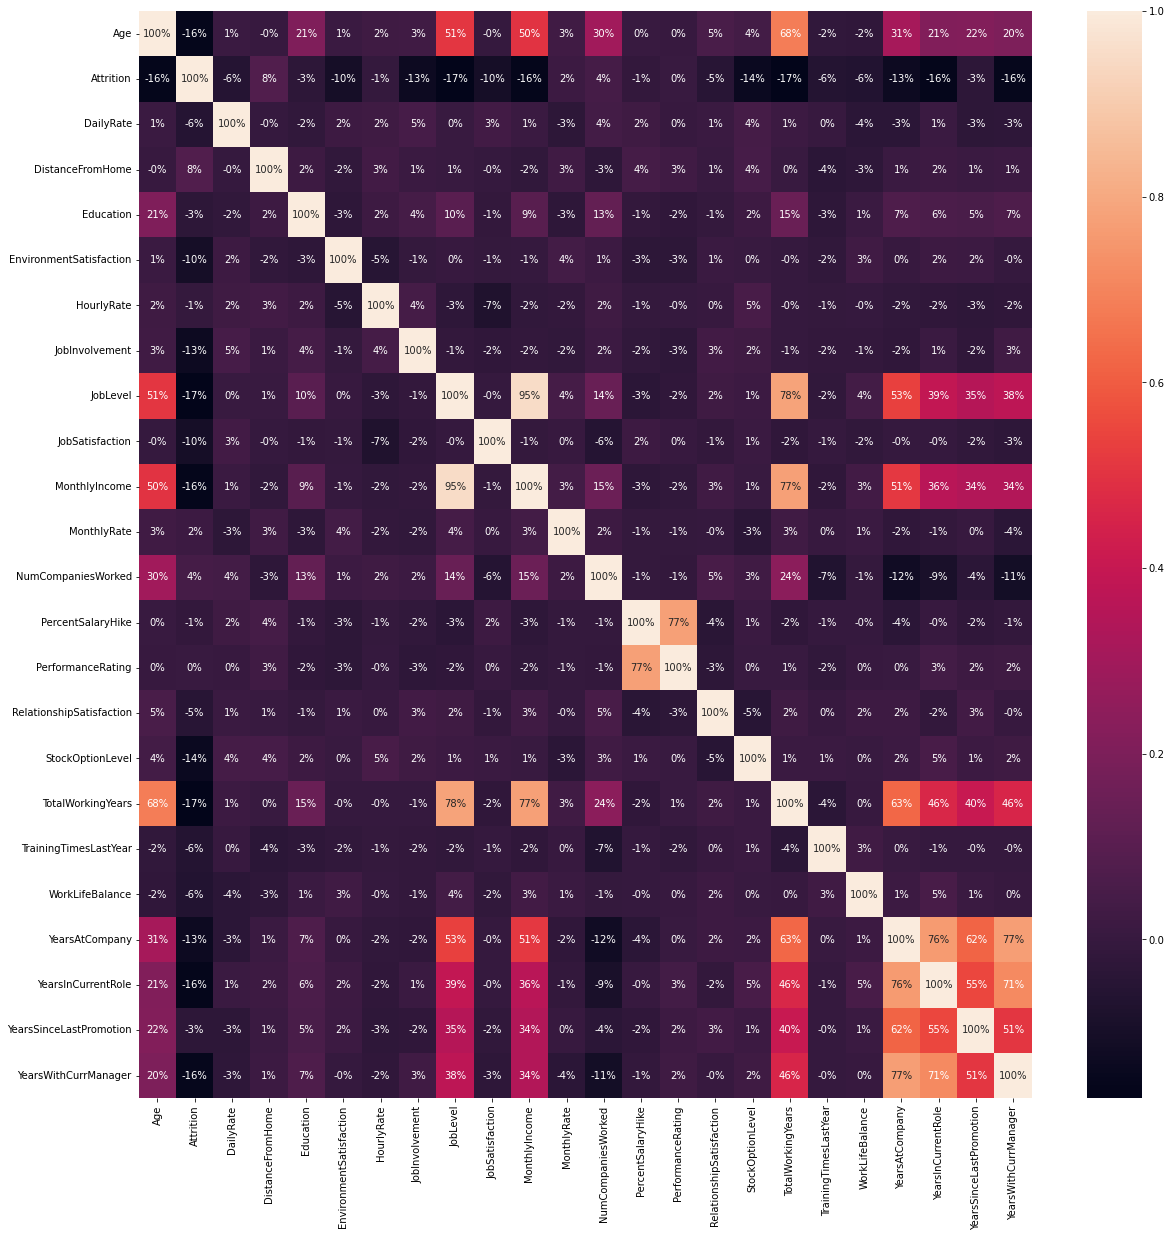

In [39]:
# For checking the correlation using heatmap

plt.figure(figsize=(20,20))
sns.heatmap(corr1, annot=True, fmt=".0%")

# Bivariate Analysis:-

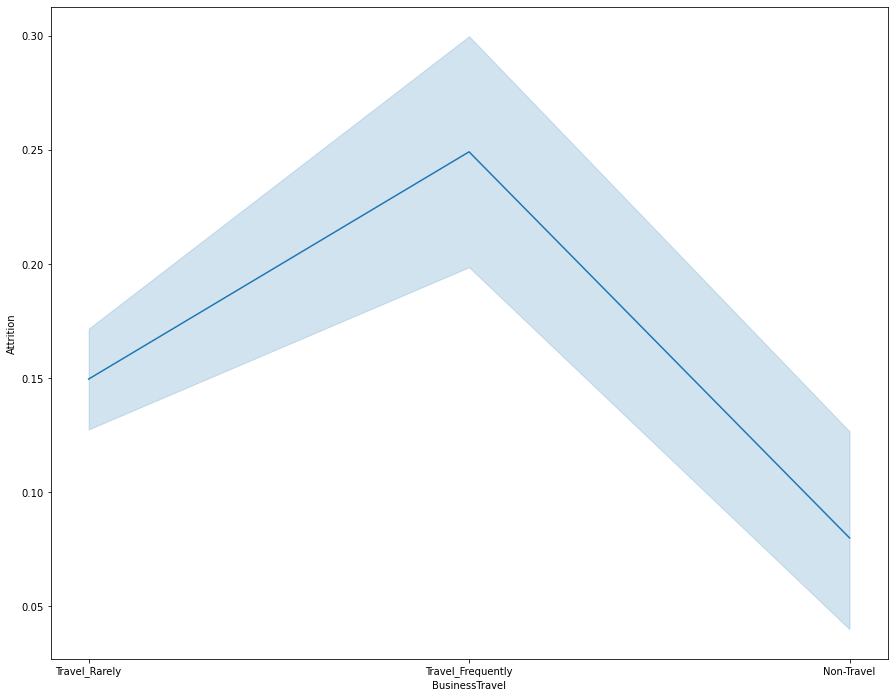

In [40]:
# For checking Correlation of Target column with other columns in dataset using plotting method:LinePlot
plt.figure(figsize=(15,12))
sns.lineplot(y="Attrition",x="BusinessTravel",data=data)
plt.show()

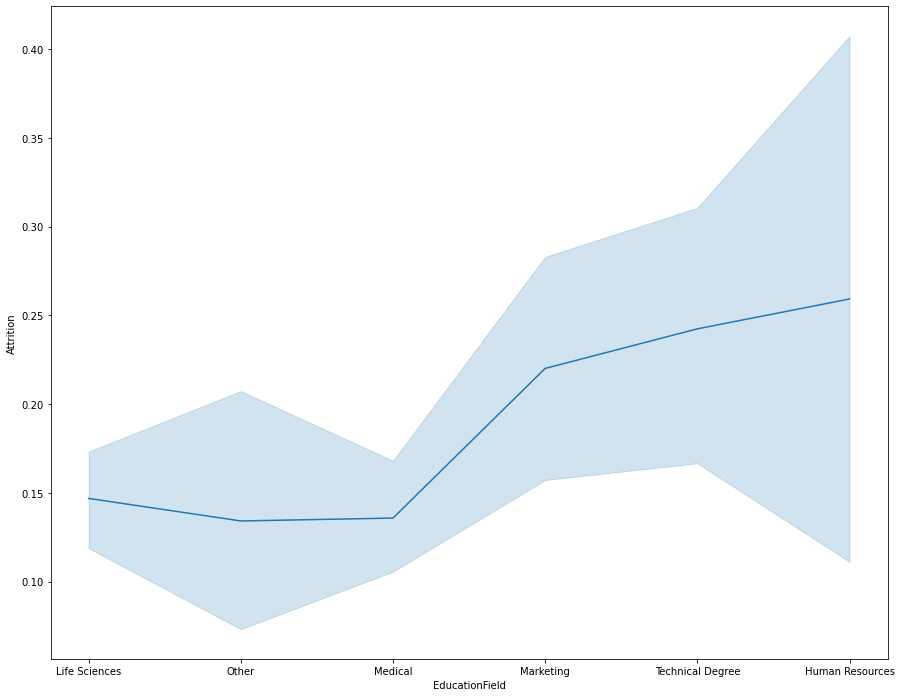

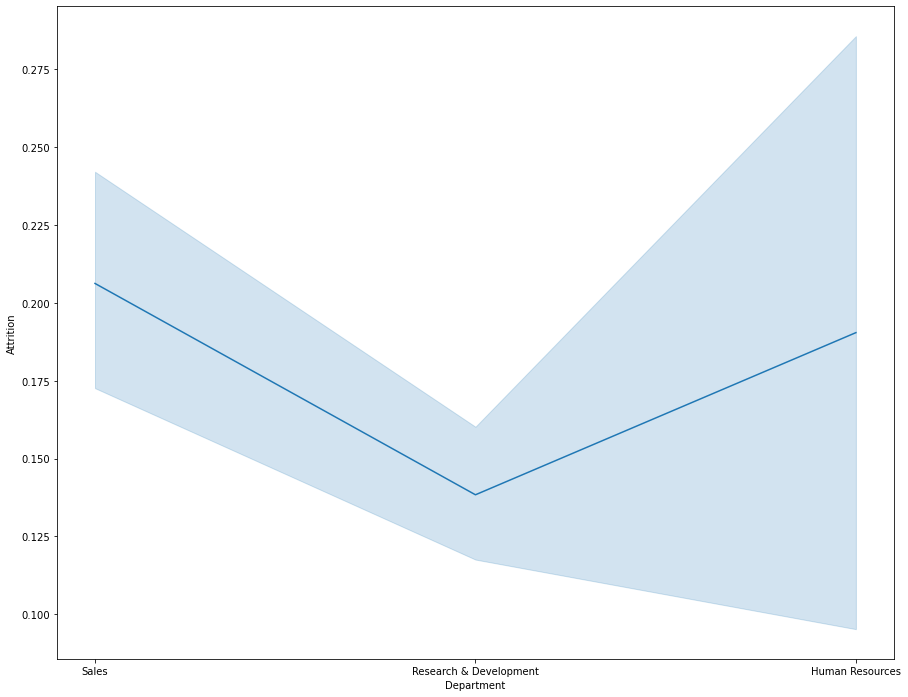

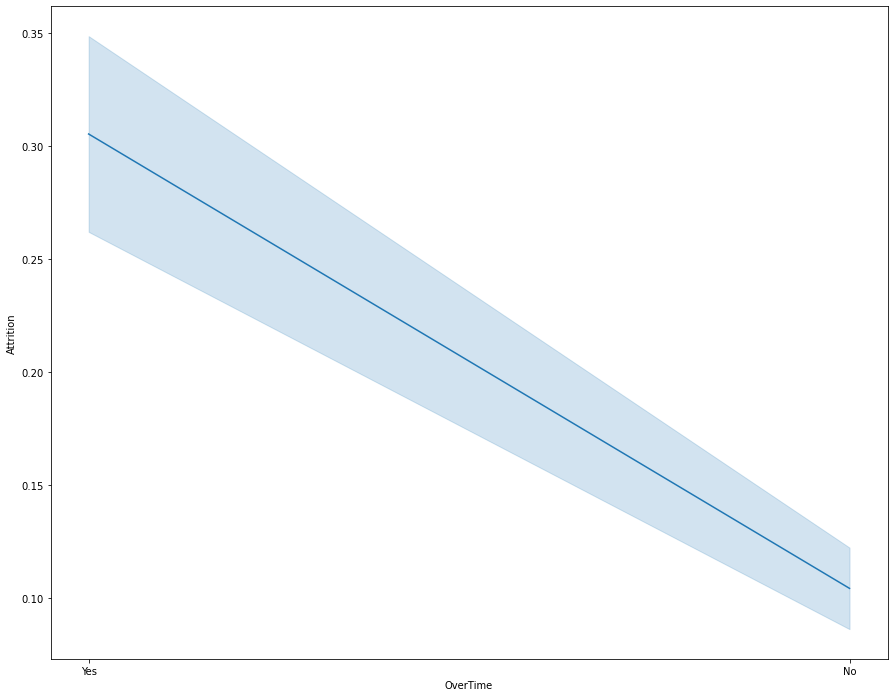

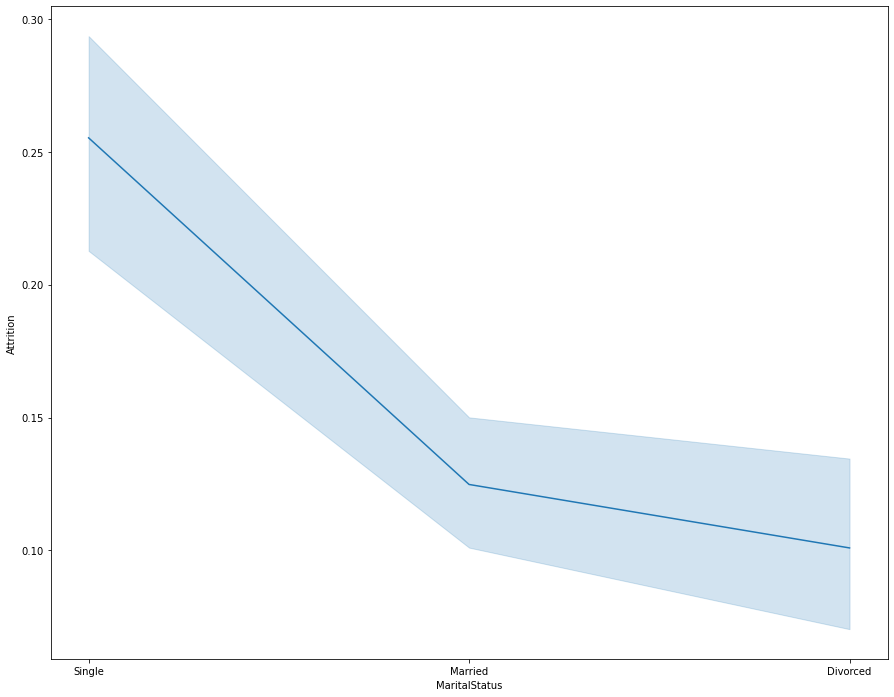

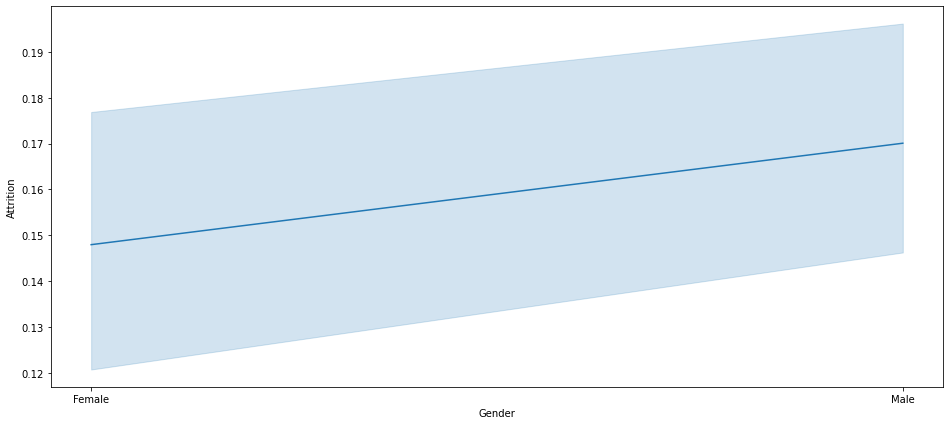

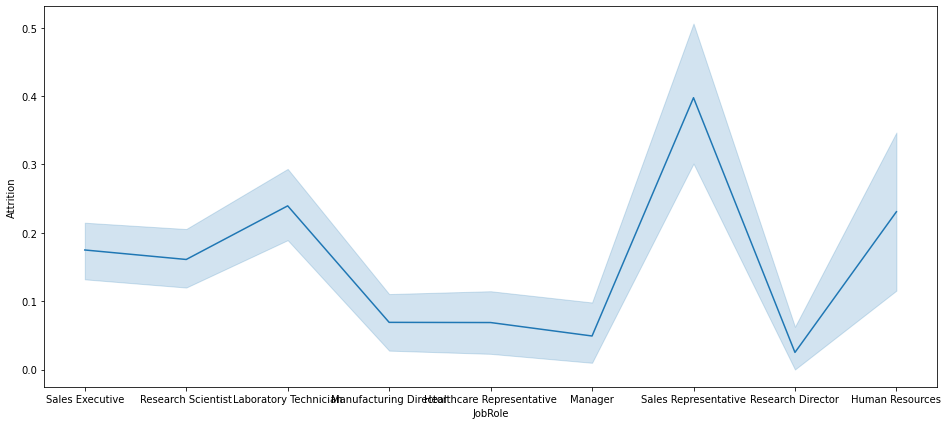

In [41]:
# For checking correlation among different columns

plt.figure(figsize=(15,12))
sns.lineplot(x="EducationField",y="Attrition",data=data)
plt.show()

plt.figure(figsize=(15,12))
sns.lineplot(x="Department",y="Attrition",data=data)
plt.show()

plt.figure(figsize=(15,12))
sns.lineplot(x="OverTime",y="Attrition",data=data)
plt.show()
# For checking Marital status correlation
plt.figure(figsize=(15,12))
sns.lineplot(x="MaritalStatus",y="Attrition",data=data)
plt.show()

plt.figure(figsize=(16,7))
sns.lineplot(x="Gender",y="Attrition",data=data)
plt.show()

plt.figure(figsize=(16,7))
sns.lineplot(x="JobRole",y="Attrition",data=data)
plt.show()

In this plotting above, it is seen that Attrition rate is high between Employees who are travelling very frequent on business trips and lowest among the people who are not travelling much.

Employees from EducationField Marketing, Technical Degree and Human Resources are having highest Attrition Rate.

Employees from sales department has highest Attrition rate,also Human Resource department and least in Research an Development Department.

Attrition Rate is High among the Employees who work Overtime.

Attrition rate is high among the Employees who are Single and least who are Divorced.

Females are staying in same job more than males.

Sales Representative job Role, Human Resource and Laboratory Technician are having Highest Attrition rate and least are among Manager & Research Director.

# Multivariate Analysis:-

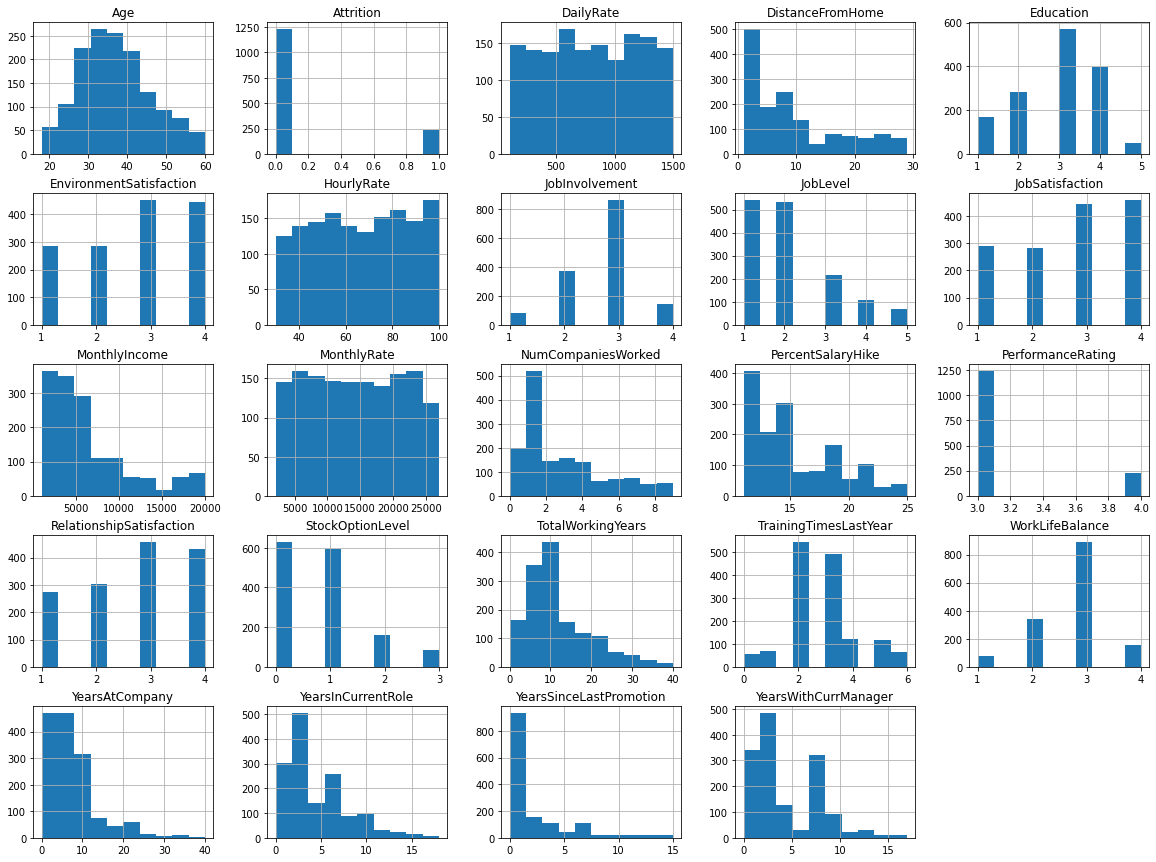

In [42]:
# For checking distributions using another plotting method: Histogram
data.hist(figsize=(20,15))
plt.show()

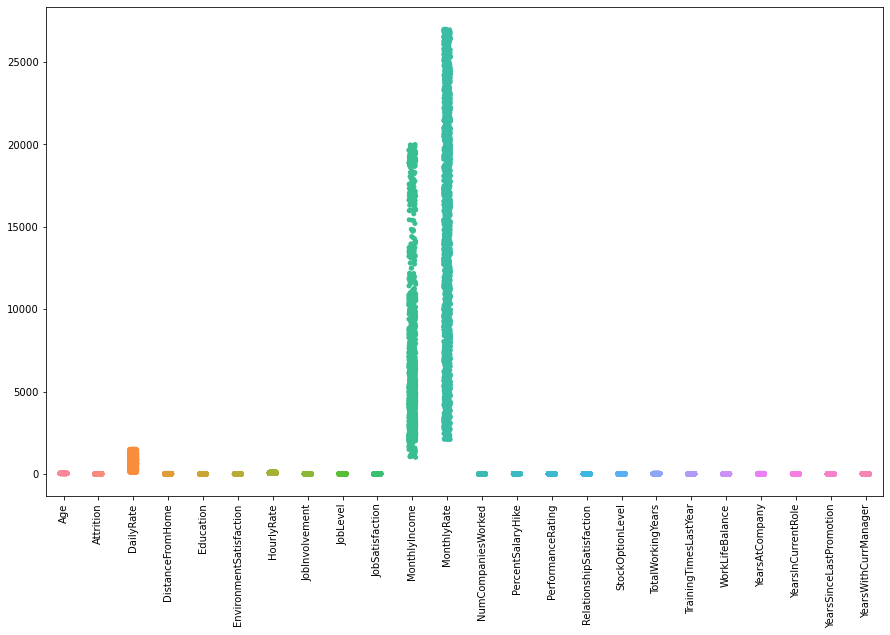

In [43]:
# For checking distribution with another plotting method
plt.figure(figsize=(15,9))
sns.stripplot(data=data)
plt.xticks(rotation=90)
plt.show()

# ENCODING TECHNIQUES:-

In [44]:
# For converting categorical columns to numerical values with LabelEncoder
# For importing required Libraries

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtype == np.number:
        continue
    data[i]= LabelEncoder().fit_transform(data[i])

In [45]:
# For checking whether data has been converted or not
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [46]:
data["DATEOFB"]= data["Age"]

# Droping the column Age to remove duplicate data
data= data.drop("Age", axis = 1)
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DATEOFB
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


Attrition                      AxesSubplot(0.125,0.125;0.0209459x0.755)
BusinessTravel              AxesSubplot(0.150135,0.125;0.0209459x0.755)
DailyRate                    AxesSubplot(0.17527,0.125;0.0209459x0.755)
Department                  AxesSubplot(0.200405,0.125;0.0209459x0.755)
DistanceFromHome            AxesSubplot(0.225541,0.125;0.0209459x0.755)
Education                   AxesSubplot(0.250676,0.125;0.0209459x0.755)
EducationField              AxesSubplot(0.275811,0.125;0.0209459x0.755)
EnvironmentSatisfaction     AxesSubplot(0.300946,0.125;0.0209459x0.755)
Gender                      AxesSubplot(0.326081,0.125;0.0209459x0.755)
HourlyRate                  AxesSubplot(0.351216,0.125;0.0209459x0.755)
JobInvolvement              AxesSubplot(0.376351,0.125;0.0209459x0.755)
JobLevel                    AxesSubplot(0.401486,0.125;0.0209459x0.755)
JobRole                     AxesSubplot(0.426622,0.125;0.0209459x0.755)
JobSatisfaction             AxesSubplot(0.451757,0.125;0.0209459

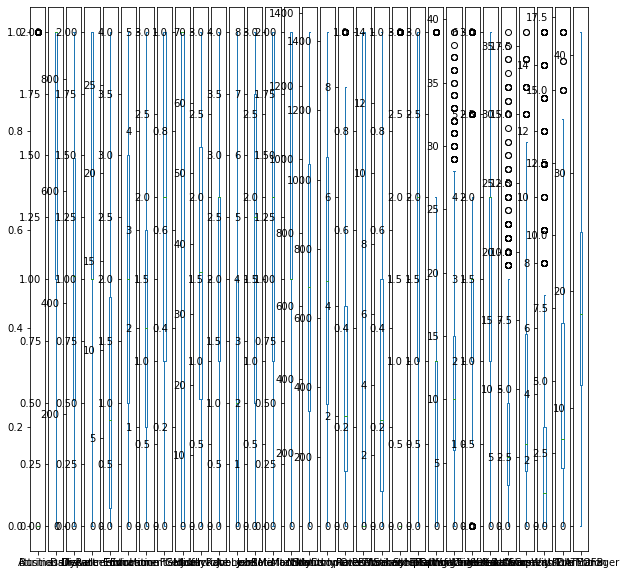

In [47]:
# For checking the outliers present in our dataset:-
data.plot(kind='box',figsize=(10,10),subplots=True)

In [48]:
# For removal of outliers
# For importing Libraries for Z Score

from scipy.stats import zscore

zscore = np.abs(zscore(data))
threshold=3
data1= data[(zscore<3).all(axis=1)]
print("Previous shape: ", data.shape)
print("Current Shape: ", data1.shape)
print("Data Lost after removal: ", (data.shape[0]-data1.shape[0])/data.shape[0]*100)

Previous shape:  (1470, 31)
Current Shape:  (1387, 31)
Data Lost after removal:  5.646258503401361


In this, 83 rows has been removed as outliers using Zscore method and in terms of percentage it comes to 5.6%

In [49]:
# For confirming that the removal has been done.
data1.shape

(1387, 31)

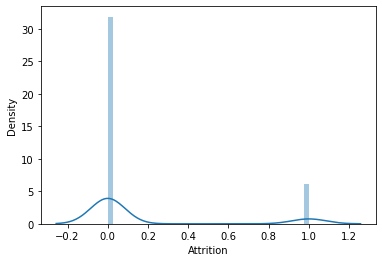

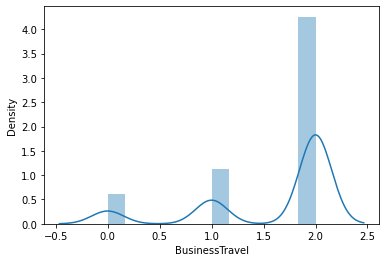

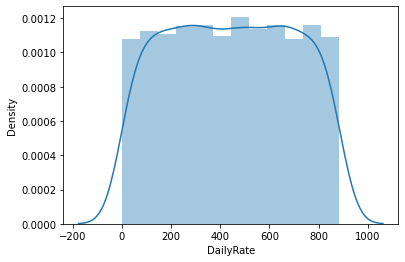

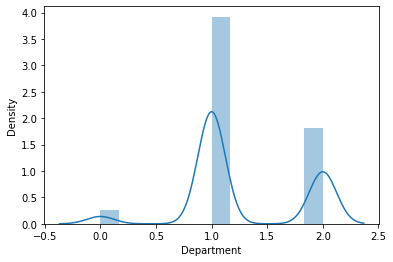

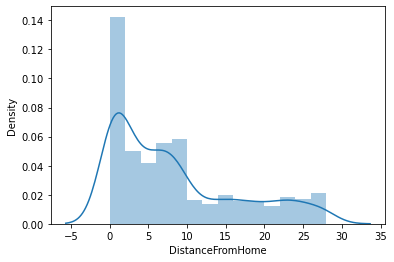

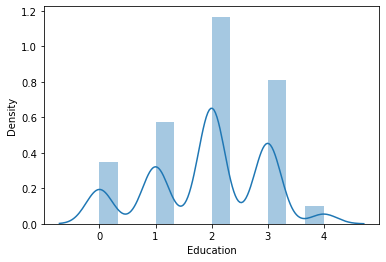

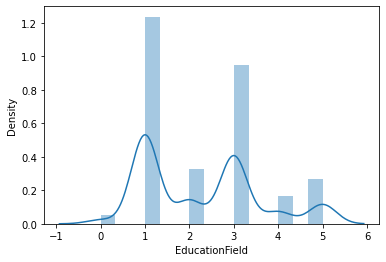

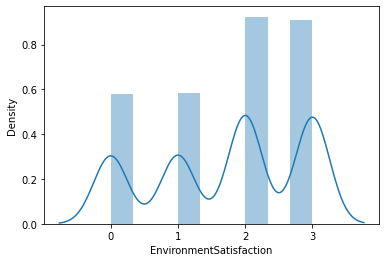

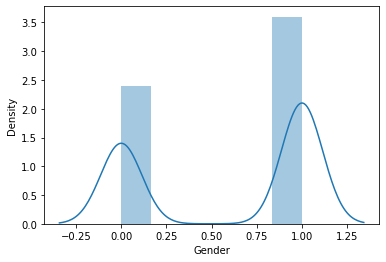

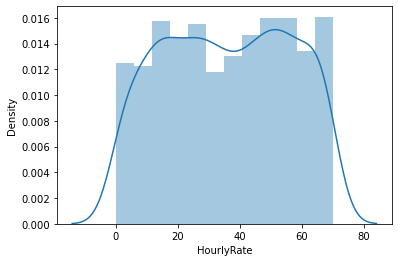

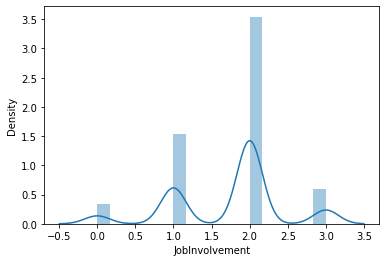

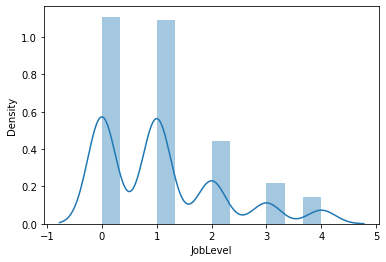

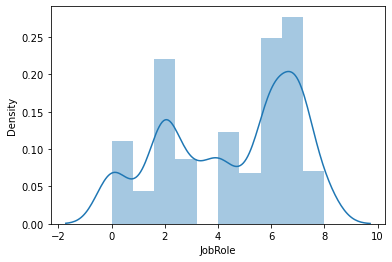

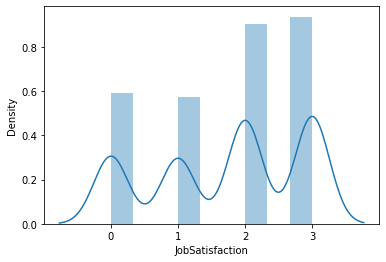

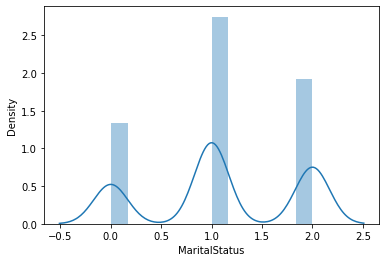

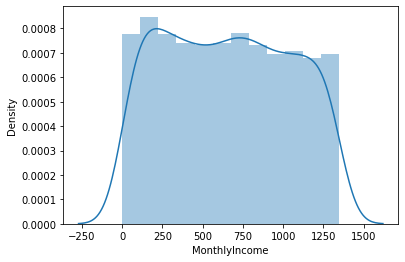

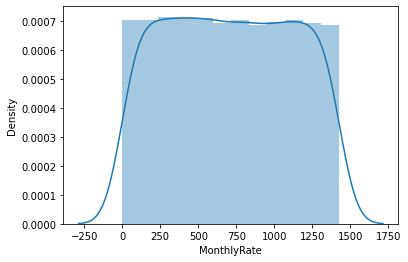

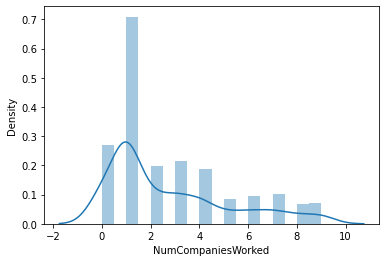

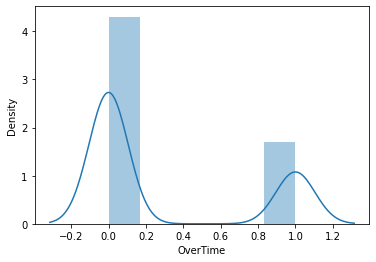

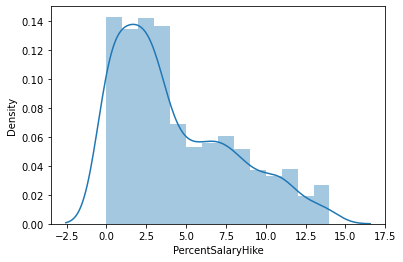

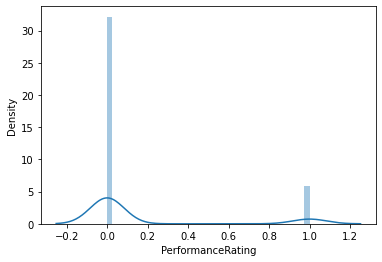

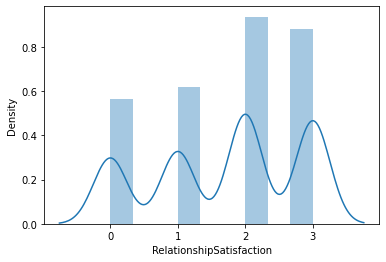

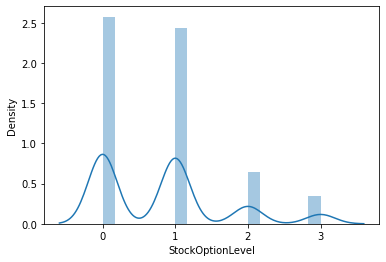

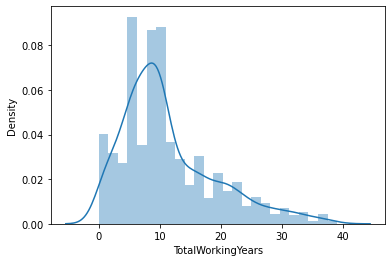

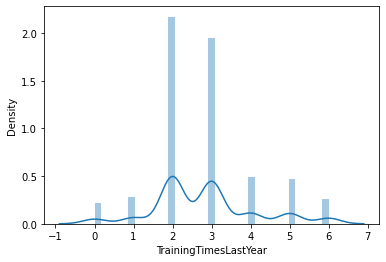

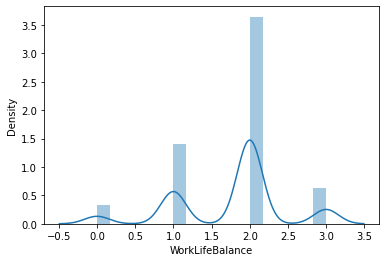

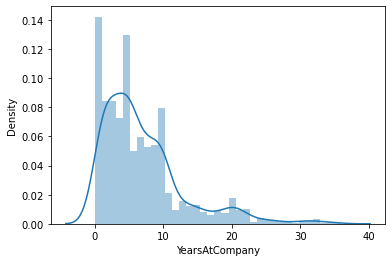

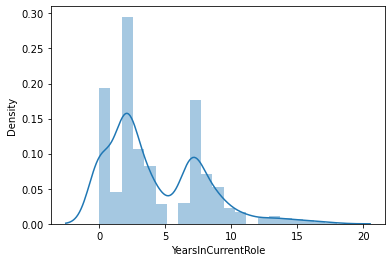

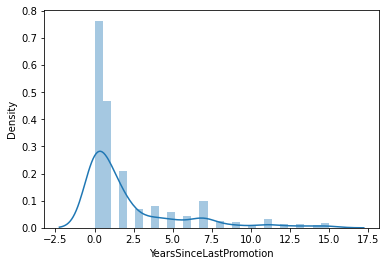

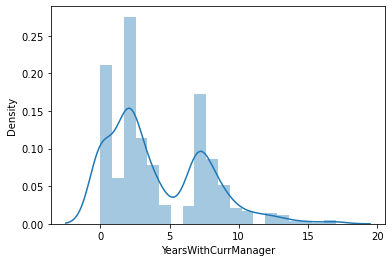

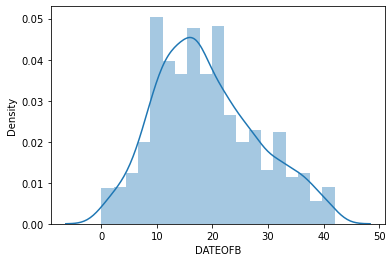

In [50]:
# For checking Skewness using distplot.
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])
    plt.show()

In [51]:
data1.skew()

Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

In [52]:
# Now for removing skewness using Cuberoot:-
skewness=["JobLevel","PerformanceRating","YearsAtCompany","YearsSinceLastPromotion",]

for i in skewness:
    data1[i]=np.cbrt(data[i])

In [53]:
# For checking skewness is removed or not
data1.skew()

Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                   -0.240467
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.700051
Y

Here, the skewness has been removed for proceeding to next phases.


# Model Building:-

In [54]:
# For Importing libraries for models:-

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
# For assigning values to x and y for model training and testing phases:-
X=data.iloc[:,1:data.shape[1]].values
Y=data.iloc[:,0].values
Maccu=0
Mrs=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>Maccu:
        Maccu=acc_score
        Mrs=i

print("accuracy score is", Maccu,"Random State", Mrs)

accuracy score is 89.67391304347827 Random State 947


In [56]:
# for dividing 25% data for testing and rest for training phase:-

# For importing required libraries:-
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=947)

# Cross Validation Phase along with Building Classification Model :-

In [57]:
# Defining a classification model function master for all the models.

def classify (model,X,Y):
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # For printing accuracy - Cross validation scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [92]:
# Checking with Logestic Regression because it is also used for Binary Classification.
m=LogisticRegression()
classify(m,X,Y)

Accuracy Score: 89.67391304347827

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       325
           1       0.73      0.19      0.30        43

    accuracy                           0.90       368
   macro avg       0.81      0.59      0.62       368
weighted avg       0.88      0.90      0.87       368

Cross Validation Score: 84.35374149659864

Accuracy Score - Cross Validation Score is 5.320171546879621


# Checking with Support Vector Classifier:-

In [94]:
m=SVC(C=1.0, kernel="rbf", gamma="auto", random_state=45)
classify(m,X,Y)

Accuracy Score: 88.31521739130434

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       325
           1       0.00      0.00      0.00        43

    accuracy                           0.88       368
   macro avg       0.44      0.50      0.47       368
weighted avg       0.78      0.88      0.83       368

Cross Validation Score: 83.87755102040816

Accuracy Score - Cross Validation Score is 4.437666370896181


Here with SVC, the accuracy score coming is 88.3% which is good and Cv score is 84 %

# Checking with Decision Tree Classifier:-

In [95]:
m=DecisionTreeClassifier(random_state=32,max_depth=15)
classify(m,X,Y)

Accuracy Score: 82.88043478260869

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       325
           1       0.35      0.56      0.43        43

    accuracy                           0.83       368
   macro avg       0.64      0.71      0.67       368
weighted avg       0.87      0.83      0.84       368

Cross Validation Score: 78.9795918367347

Accuracy Score - Cross Validation Score is 3.9008429458739897


Here with Decision Tree, Accuracy score is 83% and Cv score is 79 %

# Checking with RandomForestClassifier:-

In [96]:
m=RandomForestClassifier(max_depth=18, random_state=90)
classify(m,X,Y)

Accuracy Score: 88.58695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       325
           1       0.53      0.19      0.28        43

    accuracy                           0.89       368
   macro avg       0.72      0.58      0.61       368
weighted avg       0.86      0.89      0.86       368

Cross Validation Score: 85.44217687074831

Accuracy Score - Cross Validation Score is 3.1447796509908272


Here with RandomForest, Accuracy Score is 89% and Cv score is 85 %

# Checking with KNeighborsClassifier:-

In [97]:
m=KNeighborsClassifier(n_neighbors=15)
classify(m,X,Y)

Accuracy Score: 88.04347826086956

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       325
           1       0.43      0.07      0.12        43

    accuracy                           0.88       368
   macro avg       0.66      0.53      0.53       368
weighted avg       0.84      0.88      0.84       368

Cross Validation Score: 84.01360544217688

Accuracy Score - Cross Validation Score is 4.029872818692681


# Checking with XGBoost( Gradient Boost Classifier):-

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
m=GradientBoostingClassifier(n_estimators=15)
classify(m,X,Y)

Accuracy Score: 89.40217391304348

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       325
           1       0.64      0.21      0.32        43

    accuracy                           0.89       368
   macro avg       0.77      0.60      0.63       368
weighted avg       0.87      0.89      0.87       368

Cross Validation Score: 85.78231292517006

Accuracy Score - Cross Validation Score is 3.619860987873423


Here with XGBoost it is giving good Accuracy score of 89.4%

But proceeding with LogesticRegresssion as it is giving best highest accuracy with 89.6 % for model building.

# HYPER PARAMETER TUNING ON BEST MODEL USING GRID SEARCH CV:-

In [2]:
# Proceeding with Logestic Regression as best model
parameters={'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [8]:
# Used DecisionTree here because it is the best classifier used for Hyperparameter tuning
lg=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [58]:
lg.fit(x_train,y_train)
lg.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 2,
 'random_state': 111,
 'splitter': 'random'}

In [130]:
lg.best_score_

0.8348498560263267

So, as per GridSearch CV above is the best score which is arrived out of it.

In [132]:
FinalModel=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=3,random_state=42,splitter='random')

classifier=FinalModel.fit(x_train,y_train)

cf_pred=FinalModel.predict(x_test)

cf_acc=(accuracy_score(y_test, cf_pred))*100
print("Accuracy Score from best model: ",cf_acc)

Accuracy Score from best model:  87.77173913043478


# Plotting AUC/ ROC Curve:-

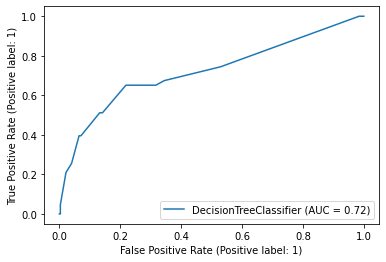

In [133]:
# For plotting ROC/AUC Curve
disp=metrics.plot_roc_curve(FinalModel, x_test, y_test)
plt.show()

As TruePostiveRate AND FalsePositiveRate  is clearly seen above.

#  Plotting Confusion Matrix:-

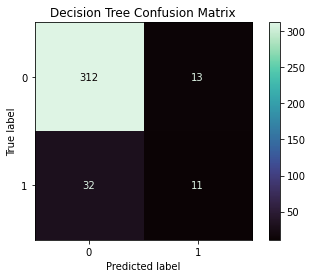

In [134]:
ClassName=data.columns
metrics.plot_confusion_matrix(classifier, x_test,y_test, cmap='mako')
plt.title('Decision Tree Confusion Matrix')
plt.show()

As seen above the confusion matrix between the True and predicted Label

# For Saving the best Model:-

In [135]:
# For importing neccessary libraries for saving model:-
import pickle

FileName = "HRAnalyticsModel.pkl"
pickle.dump(FinalModel,open(FileName,'wb'))

# Loading the Saved Model:-


In [136]:
Saved=pickle.load(open('HRAnalyticsModel.pkl','rb'))
Result=Saved.score(x_test,y_test)
print(Result)

0.8777173913043478


So, as seen above the loaded model is giving the same accuracy of 88 %

Thanks